# 1880년부터  2014년까의 미국의 아기 이름을 정리해논 데이터셋

In [1]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv", stringsAsFactors = F) # 문자열을 factor로 받지않는다
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [3]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [4]:
baby$Gender <- as.factor(baby$Gender) # 범위값
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [5]:
# baby의 Year부분 정리하기
baby$Year <- substr(baby$Year, 7, 10)  # remove보다 substr이 빠르다, 대용량 파일에서 불필요한 부분만 제거해도 용량이 대폭 감소한다
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [6]:
# 저장하기
write.csv(baby, "../Data/baby.csv", row.names=F)

In [7]:
summary(baby)

     Name           Gender          Count             Year          
 Length:1825388     F:1081660   Min.   :    5.0   Length:1825388    
 Class :character   M: 743728   1st Qu.:    7.0   Class :character  
 Mode  :character               Median :   12.0   Mode  :character  
                                Mean   :  184.7                     
                                3rd Qu.:   32.0                     
                                Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [19]:
# babay에서 여자 아이만 Female 이라는 dataset를 만들고 row수 구하기
Female <- subset(baby, Gender == "F") # ""잊지말고 사용
nrow(Female)

[1] 1081660

In [21]:
# 여자 아이 이름중 중복 제거하고 갯수 구하기
length(unique(Female$Name))

[1] 64911

In [56]:
# 유일한 여자 아이 이름 20개만 출력하기
sample(unique(Female$Name), 20)

[1] "Tyrielle" "Yonika"   "Beckah"   "Andreca"  "Myphuong" "Saily"   
 [7] "Andelynn" "Araeya"   "Kornelia" "Matlyn"   "Lakesa"   "Simayah" 
[13] "Silvya"   "Nyosha"   "Geargia"  "Kearstin" "Ranylah"  "Asiya"   
[19] "Brizeyda" "Desarey"

---
### 가장많이 사용된 여자 아이 이름 10개 보여주기

In [116]:
library(dplyr)
head(Female)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [117]:
femaleName <- aggregate(Count ~ Name, Female, sum)
head(arrange(femaleName, desc(Count)) , 10)

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


In [118]:
# baby에서 남자 아이만 Male이라는 데이터넷을 만들고 row수 구하기

Male <- subset(baby, Gender == "M")
nrow(Male)

[1] 743728

In [167]:
# 남여 연도별 합계

FemaleSum <- aggregate(Count ~ Year, Female, sum)
MaleSum <- aggregate(Count ~ Year, Male, sum)

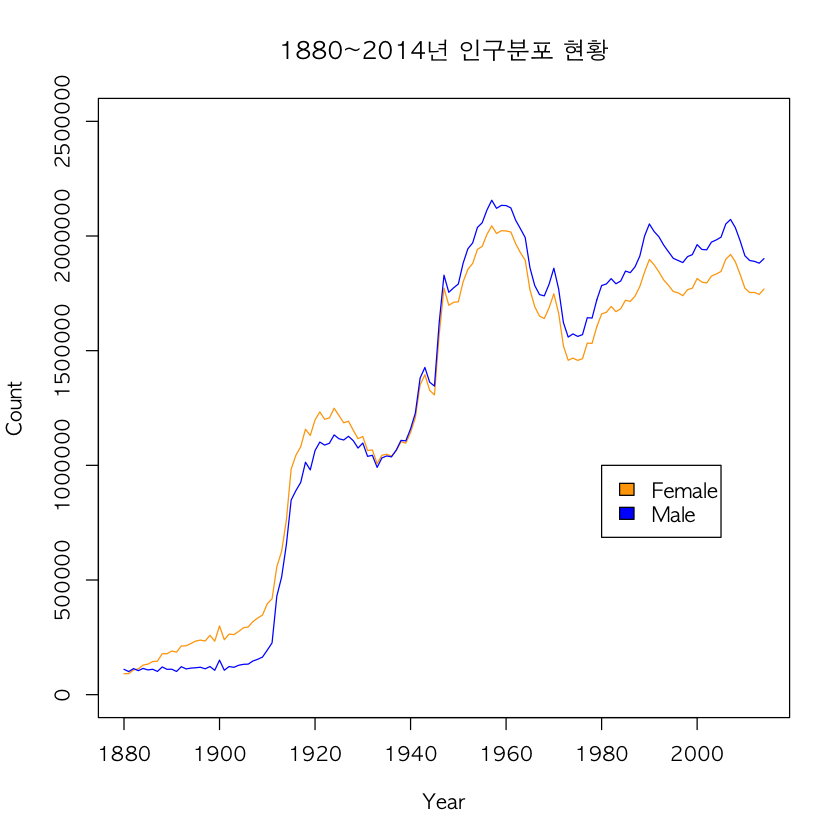

In [159]:
options(warn = -1)
par(family = "AppleGothic")
+

plot(FemaleSum, # 데이터프레임 가능
     type = "l",
     col = "orange",
     ylim = c(0, 2500000),
     main = '1880~2014년 인구분포 현황',
     ylab = "Count",
     xlab = "Year"
    )

lines(MaleSum, # MaleSum[,1]로 할경우 X축 인덱스가 1부터 시작하므로 1880년도부터 나오는 그래프에 출력되지 않음
      col = 'blue',
    )

legend(1980,1000000,
      c("Female", "Male"),
      fill=c("orange", "blue") 
      )